## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [211]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [212]:
from sklearn.datasets import load_wine
data = load_wine()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [213]:
X.isnull().sum()
#нет пропусков, нет категориальных переменных, только количественные

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [224]:
from sklearn.model_selection import train_test_split
np.random.seed(13)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [225]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [230]:
print('neighbors\ttest\ttrain')
scale = StandardScaler()
new_train_X = scale.fit_transform(train_X[['alcohol', 'magnesium']])
new_test_X = scale.transform(test_X[['alcohol', 'magnesium']])
for neighbors in [1, 3, 5, 10, 15, 25]:
    clf = KNeighborsClassifier(n_neighbors=neighbors, p=2).fit(new_train_X, train_y)
    y_pred_test = clf.predict(new_test_X)
    y_pred_train = clf.predict(new_train_X)

    print(neighbors,np.mean(test_y == y_pred_test), np.mean(train_y == y_pred_train),sep='\t')

neighbors	test	train
1	0.7037037037037037	1.0
3	0.7592592592592593	0.8145161290322581
5	0.7222222222222222	0.7983870967741935
10	0.6666666666666666	0.7741935483870968
15	0.6851851851851852	0.7903225806451613
25	0.6481481481481481	0.7258064516129032


|**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [39]:
!pip install mlxtend

     ---------------------------------------- 1.3/1.3 MB 4.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\meto\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [231]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

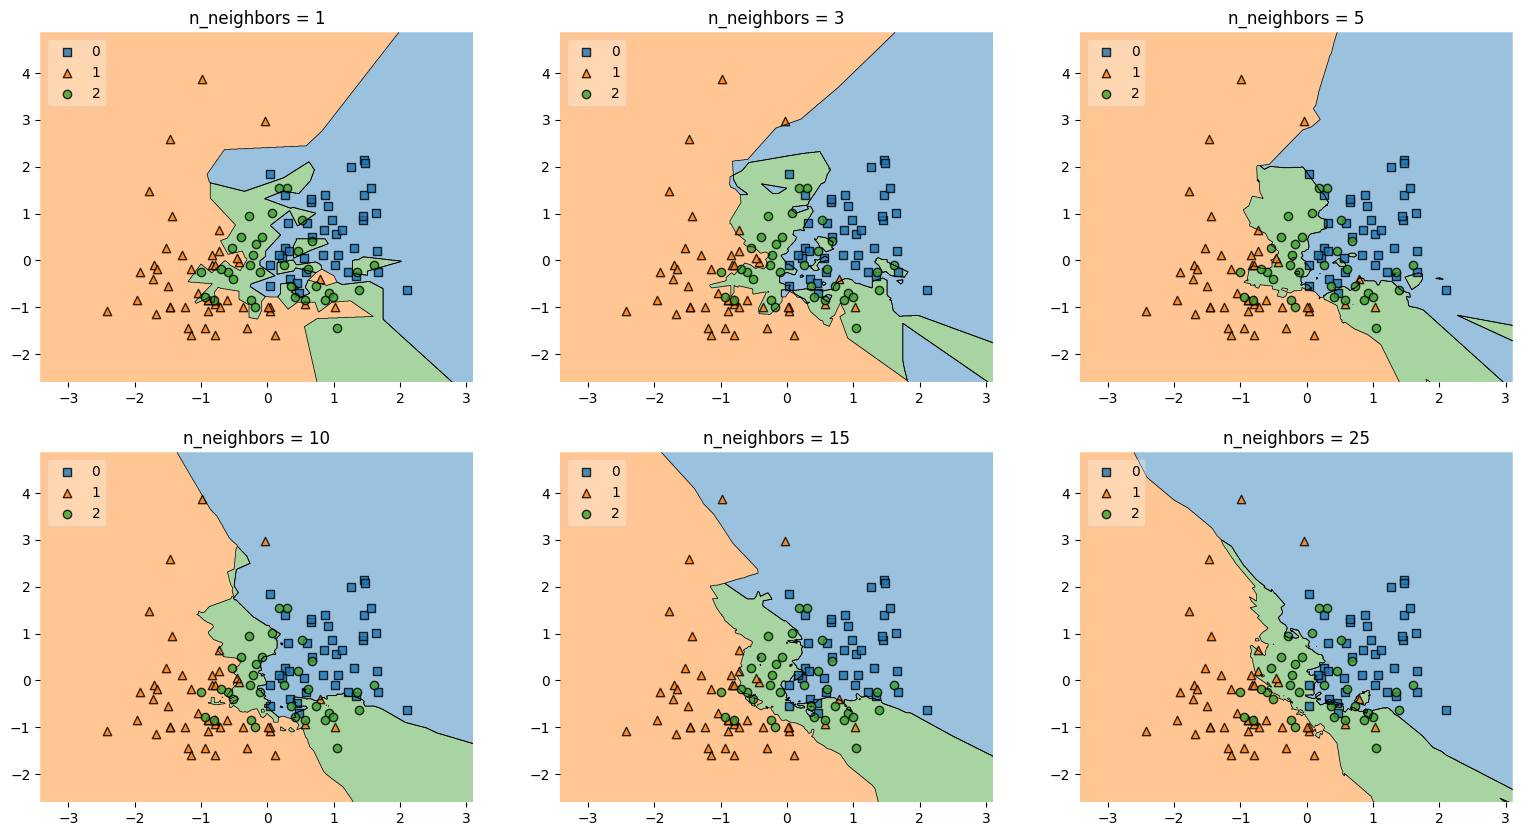

In [232]:
# Plotting Decision Regions
# http://rasbt.github.io/mlxtend/
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(19, 10))

for neighbors, grd in zip([1, 3, 5, 10, 15, 25],
                          itertools.product([0, 1, 2],
                                            repeat=2)):
    scale = StandardScaler()
    lab = f'n_neighbors = {neighbors}'
    new_train_X = scale.fit_transform(train_X[['alcohol', 'magnesium']])
   # display(new_train_X)
    clf = KNeighborsClassifier(n_neighbors=neighbors, p=2)
    clf.fit(new_train_X, train_y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=new_train_X, y=train_y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Я считаю что нужно использовать число соседей равное 10 или 5, потому что в данных случаях поверхность не слишком переобучена и заметно четкое разделение классов. Хоть и по тестовой выборке больше подходит число соседей равное 3, но считаб, что при большем количестве разнообразных новых данных, модель с количеством соседей, равным 5 или 10, покажет себя лучше. Если рассматривать варианнт 10 или 5 соседей, то кажется, что число соседей равное 5 подходит больше, хоть и есть некая странная зеленая область в синей, но разграничение, как я думаю лучше.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

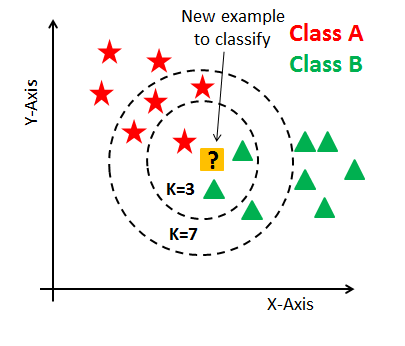

In [335]:
# https://www.educative.io/answers/how-to-compute-the-euclidean-distance-between-two-arrays-in-numpy
import numpy as np
from collections import Counter


class KNN:
    def __init__(self, k: int):
        self.k = k

    def fit(self, X, y):
        self.x_train = X
        self.y_train = y

    def predict(self, X):
        def answer(to_dist):
            dist = []
            for i in range(len(self.x_train)):
                dist.append([sum((np.square(self.x_train[i]-to_dist)))**0.5 , self.y_train[i]])
            d = dict()
            for i in sorted(dist, key = lambda  x: x[0])[:self.k]:
                d[i[1]] = d.get(i[1],0) + 1
            return sorted(d.items(), key = lambda x : x[1], reverse= True)[0][0]

        to_ret = []
        for i in X:
            to_ret.append(answer(i))
        return np.array(to_ret)

In [336]:
# Не меняйте файл!
def test_knn(KNN):
    knn = KNN(k=1)
    X_train = np.array([[1, 1], [2, 2]])
    y_train = np.array([0, 1])
    X_test = np.array([[1.5, 1.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [0]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[9.5, 9.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[5.5, 5.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[15, 15]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[5, 5], [2, 2]])
    knn.fit(X_train, y_train)
    assert all(knn.predict(X_test) == [1, 0])

In [337]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [338]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [339]:
data.isnull().sum()
#нет пропусков

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [340]:
data = data.drop('Unnamed: 0',axis = 1)
#Был бесполезный столбец с индексами

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [341]:
data.corr()
# больше всего коррелируют carat, x,y,z

C:\Users\meto\AppData\Local\Temp\ipykernel_13840\769126525.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [342]:
data = pd.get_dummies(data,columns=['cut','color','clarity'])
data

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


|**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [343]:
y = data['price']
data = data.drop('price',axis = 1)
x_train,x_test,y_train,y_test = train_test_split(data,y,test_size=0.3,random_state=13)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [344]:
scaler = StandardScaler()
x_train[['carat','depth','table','x','y','z']] = scaler.fit_transform(x_train[['carat','depth','table','x','y','z']])
x_test[['carat','depth','table','x','y','z']] = scaler.transform(x_test[['carat','depth','table','x','y','z']])

In [345]:
x_train

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
32486,-0.819636,-1.307392,1.134229,-0.831130,-0.833144,-0.943644,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
34734,-0.904263,-0.391640,-0.650558,-0.974070,-0.929254,-0.971855,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
15486,0.597868,-0.321198,-0.650558,0.803748,0.861881,0.777200,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
49132,-0.502285,-0.462083,0.241836,-0.348707,-0.378808,-0.407643,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
38212,-0.777323,0.805881,1.134229,-0.831130,-0.841882,-0.746170,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22260,1.507610,0.735439,-1.096754,1.393376,1.386115,1.482463,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
33634,-0.904263,0.101457,-0.650558,-1.009805,-1.016627,-0.985960,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
32842,-0.925420,-0.180313,-1.096754,-1.009805,-1.016627,-1.014170,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
47280,-1.052361,0.101457,1.580426,-1.304619,-1.261269,-1.253960,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [346]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression().fit(x_train,y_train)

print('Train',mean_squared_error(y_train,model.predict(x_train)))
print('Test',mean_squared_error(y_test,model.predict(x_test)))

Train 1260998.0737856878
Test 1316572.5876282288


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [347]:
np.set_printoptions(suppress=True)
print(np.array(model.coef_,dtype=float))
#На порядок отличаются от других - carat, x

[ 5.44389888e+03 -9.17261688e+01 -6.12763562e+01 -1.27294954e+03
  1.90751467e+01 -1.67225196e+01 -6.25769678e+14 -6.25769678e+14
 -6.25769678e+14 -6.25769678e+14 -6.25769678e+14 -5.72546111e+15
 -5.72546111e+15 -5.72546111e+15 -5.72546111e+15 -5.72546111e+15
 -5.72546111e+15 -5.72546111e+15 -6.77545857e+14 -6.77545857e+14
 -6.77545857e+14 -6.77545857e+14 -6.77545857e+14 -6.77545857e+14
 -6.77545857e+14 -6.77545857e+14]


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [348]:
from sklearn.linear_model import Lasso, Ridge
model_lasso = Lasso(alpha = 10).fit(x_train,y_train)
model_ridge = Ridge(alpha = 10).fit(x_train,y_train)
print('Изначальные веса среднее',np.mean(model.coef_))
print('Lasso',model_lasso.coef_,np.mean(model_lasso.coef_),sep='\n')
print('Ridge',model_ridge.coef_,np.mean(model_ridge.coef_),sep='\n')
#Из-за проблемы мультиколлинеарности в начальной модели, можно заметить, что изменение практически не затронуло вещественные переменные. А следовательно качество предсказания модели не улучшилось. В Lasso регрессии закономерно занулились веса категориальных признаков, но вещественные остались нетронутыми.

Изначальные веса среднее -1870286268767568.0
Lasso
[ 4964.37878788  -101.52177665   -78.76150826  -846.54814008
    -0.           -15.51460018  -432.52352244   -33.45843869
    83.49467707     0.             0.           335.98981495
   175.23497987   133.60403085     0.          -439.32770418
  -867.48928038 -1643.62436826 -3464.50556191   690.52789733
  -627.29317165 -1540.3396941    166.22337778   -19.32642363
   519.15725396   502.04357333]
-97.67614605357782
Ridge
[ 5404.79886614   -89.92712403   -61.25804782 -1227.93334966
    14.11834826   -20.04453066  -582.6882477      0.46870856
   249.73993682   177.95100651   154.52859581   817.74809748
   617.18035032   565.56931858   337.04058746  -162.58296484
  -650.75442804 -1524.20096095 -3650.96664306  1504.18075661
  -168.17236945 -1136.09638466   749.74510153   430.71340491
  1168.6114193   1101.98471482]
154.60592931681433


**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

C:\Users\meto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.416e+07, tolerance: 6.022e+07
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Ridge')

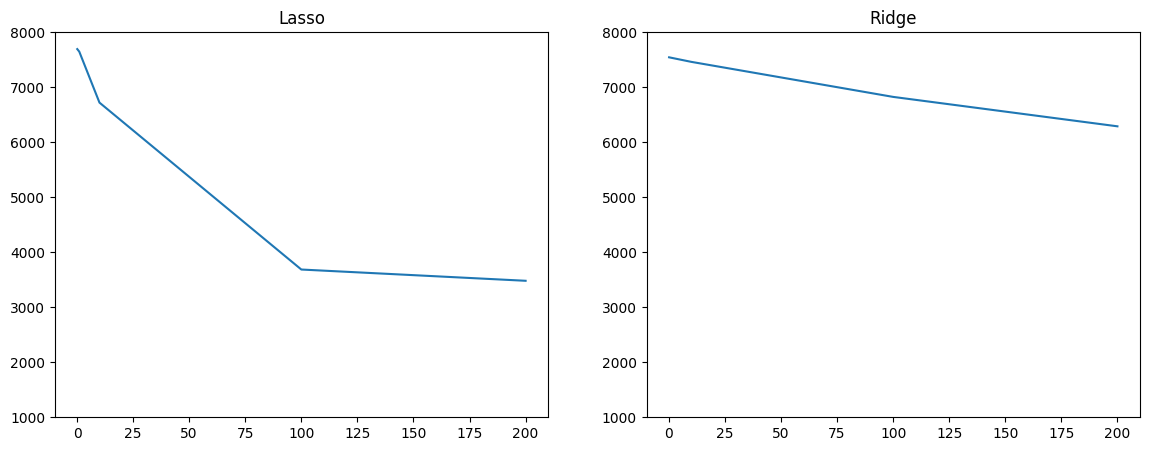

In [349]:
norm = [[],[]]
coef = [0.1,1,10,100,200]
for alpha in coef:
    model_lasso = Lasso(alpha).fit(x_train,y_train)
    model_ridge = Ridge(alpha).fit(x_train,y_train)
    norm[0].append(np.linalg.norm(model_lasso.coef_))
    norm[1].append(np.linalg.norm(model_ridge.coef_))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(14,5)
ax1.plot(coef,norm[0])
ax1.set_ylim([1000,8000])
ax1.set_title('Lasso')
ax2.plot(coef,norm[1])
ax2.set_ylim([1000,8000])
ax2.set_title('Ridge')
# Метод Lasso агрессивнее уменьшает веса, его используют для отбора признаков, т.к. некоторые признаки зануляются, в следствие чего становятся легче подсчеты, отбираются нужные/ненужные признаки.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [350]:
from sklearn.linear_model import LassoCV
model = LassoCV(cv = 5, alphas = [0.1,1,10,100,200]).fit(x_train,y_train)
cnt = 0
for i in model.mse_path_:
    print('alpha -',model.alphas_[cnt],'MSE -',np.mean(i))
    cnt += 1
# наибольшее качество при alpha = 1

C:\Users\meto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91389051.04104614, tolerance: 47992983.126967475
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\meto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6945323734.644344, tolerance: 47992983.126967475
  model = cd_fast.enet_coordinate_descent_gram(


alpha - 200.0 MSE - 2433081.2659993046
alpha - 100.0 MSE - 2218730.844594835
alpha - 10.0 MSE - 1302106.737266386
alpha - 1.0 MSE - 1269814.779576783
alpha - 0.1 MSE - 1316671.4565547933


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [351]:
lasso_model = Lasso(alpha = 1).fit(x_train,y_train)
print(lasso_model.coef_)
x_train
#Наболее информативными оказались признаки clarity, carat, color. Наименее информативные - cut, x,y,z,depth,table. Я думаю, что так выходит из-за того, что важнее внутренняя составялющая алмаза, его цвет и вес. Огранку можно исправить и после покупки, если она не устраивает, а распределение алмаза по высоте и другим осям не так важно.

[ 5398.31516582   -93.065105     -62.6982058  -1217.30013233
     0.           -13.90578789  -706.12767132  -142.69257229
    92.22396688    17.68851595     0.           469.50060293
   271.74322202   221.123073       0.          -494.46752662
  -979.99704977 -1850.23332239 -4175.99162361   960.40371394
  -686.85496053 -1653.08704545   220.35031538   -86.63780942
   634.08478168   571.37434592]


,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
32486,-0.819636,-1.307392,1.134229,-0.831130,-0.833144,-0.943644,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
34734,-0.904263,-0.391640,-0.650558,-0.974070,-0.929254,-0.971855,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
15486,0.597868,-0.321198,-0.650558,0.803748,0.861881,0.777200,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
49132,-0.502285,-0.462083,0.241836,-0.348707,-0.378808,-0.407643,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
38212,-0.777323,0.805881,1.134229,-0.831130,-0.841882,-0.746170,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22260,1.507610,0.735439,-1.096754,1.393376,1.386115,1.482463,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
33634,-0.904263,0.101457,-0.650558,-1.009805,-1.016627,-0.985960,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
32842,-0.925420,-0.180313,-1.096754,-1.009805,-1.016627,-1.014170,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
47280,-1.052361,0.101457,1.580426,-1.304619,-1.261269,-1.253960,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [352]:
print('Lasso -',mean_squared_error(y_test,lasso_model.predict(x_test)))
#Если сравнивать с пунктом 3.7 можно увидеть, что Lasso дало меньшую MSE, эффект достигается за счет регуляризации модели и отбрасывания некоторых бесполезных признаков.

Lasso - 1315964.5682518836
